# Language distribution 

Load dataset with all preprocessing steps

In [282]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv("../Materials/KVO_META.csv", encoding='latin-1', index_col=False)
df['Genre'] = df['genre'].str.lower()


In [283]:
for column in df.columns:
    try:
        df[column] = df[column].str.strip()
    except AttributeError:
        continue

In [284]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')

#We only keep season and original language for this one.
df1 = df[['Season', 'Original language']]


In [292]:
df['Original language'].value_counts()

DUI    1950
NL      905
FR      555
ITA     235
?       212
DEE     159
RUS     133
TSJ      99
ENG      12
NOR       2
Name: Original language, dtype: int64

## Prepro

In [271]:
counts = df.groupby('Season')['Original language'].value_counts().unstack().fillna(0)
#Use grouby, unstack and fillna so that zero is displayed when a language is not featured in a group (season).

# To maintain readability of the table, we only keep the five most common languages
counts = counts[['DEE', 'DUI', 'FR', 'NL', 'ITA']]

In [272]:
#We add zero counts for each language during the period when the Opera was closed.

counts.loc['1914-1915'] = [0, 0, 0, 0, 0]
counts.loc['1915-1916'] = [0, 0, 0, 0, 0]
counts.loc['1916-1917'] = [0, 0, 0, 0, 0]
counts.loc['1917-1918'] = [0, 0, 0, 0, 0]
counts = counts.sort_index()
x = list(counts.index.unique())

## Relative frequencies

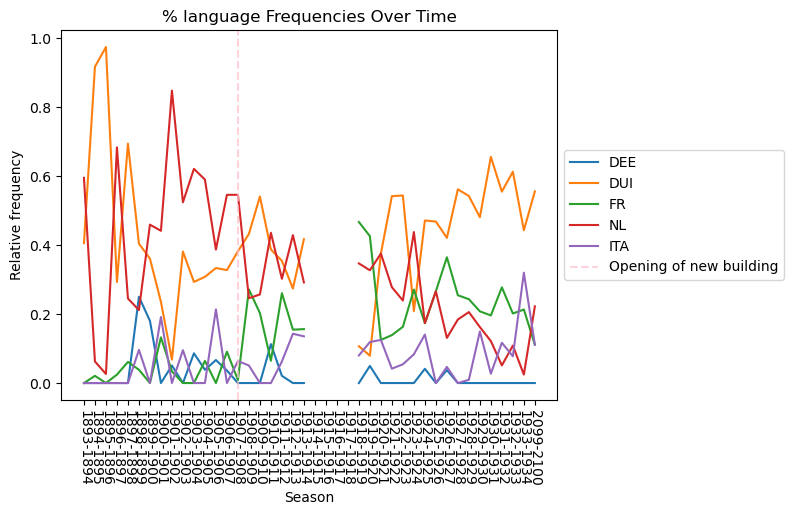

In [294]:

total_counts = counts.sum(axis=1) #we sum across rows to get total of performances per season

# compute the relative frequencies for each language in each season
rel_counts = counts.divide(total_counts, axis=0)

rel_counts.plot(kind='line')

plt.title('% language Frequencies Over Time')
plt.xlabel('Season')
plt.ylabel('Relative frequency')

#plt.axvline(x= 21, color='purple', alpha=0.4, linestyle='--', label='Start of WWI')
plt.axvline(x=14, color='pink', alpha=0.7, linestyle='--', label='Opening of new building')

plt.xticks(np.arange(len(x)), x, rotation=-90)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()


# Absolute freqs

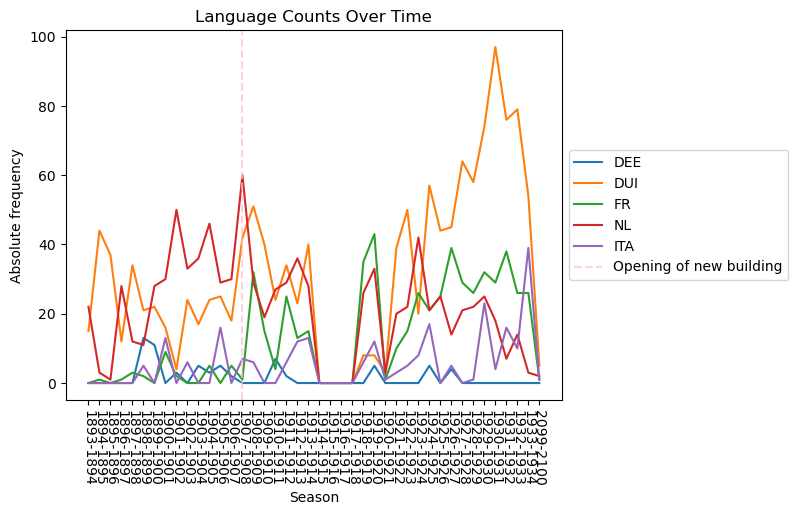

In [296]:
import matplotlib.pyplot as plt

counts.plot(kind='line')

plt.title('Language Counts Over Time')
plt.xlabel('Season')
plt.ylabel('Absolute frequency')

#plt.axvline(x= 20, color='purple', alpha=0.4, linestyle='--', label='Start of WWI')
plt.axvline(x=14, color='pink', alpha=0.7, linestyle='--', label='Opening of new building')

plt.legend(loc = 0)
x = list(counts.index)
plt.xticks(np.arange(len(x)), x, rotation=-90)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


plt.show()

## No Wagner

In [275]:
#Drop all rows containing Wagner
df2 = df.drop(df[df['Composer'].str.contains('Wagner', na = False)].index)
len(df2)

3744

In [276]:
counts = df2.groupby('Season')['Original language'].value_counts().unstack().fillna(0)

counts = counts[['DEE', 'DUI', 'FR', 'NL', 'ITA']]

In [277]:
counts.loc['1914-1915'] = [0, 0, 0, 0, 0]
counts.loc['1915-1916'] = [0, 0, 0, 0, 0]
counts.loc['1916-1917'] = [0, 0, 0, 0, 0]
counts.loc['1917-1918'] = [0, 0, 0, 0, 0]
counts = counts.sort_index()
x = list(counts.index.unique())

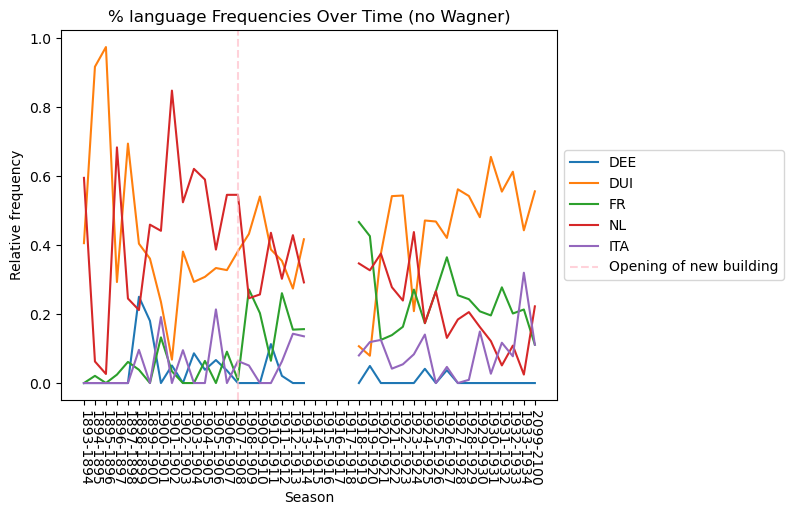

In [280]:
import matplotlib.pyplot as plt

total_counts = counts.sum(axis=1)

rel_counts = counts.divide(total_counts, axis=0)

rel_counts.plot(kind='line')

plt.title('% language Frequencies Over Time (no Wagner)')
plt.xlabel('Season')
plt.ylabel('Relative frequency')

#plt.axvline(x= 20, color='purple', alpha=0.4, linestyle='--', label='Start of WWI')
plt.axvline(x=14, color='pink', alpha=0.7, linestyle='--', label='Opening of new building')

plt.xticks(np.arange(len(x)), x, rotation=-90)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

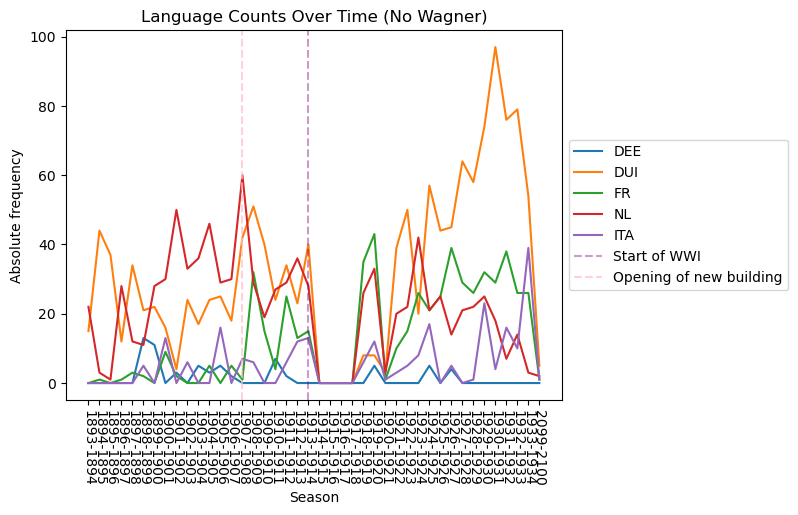

In [281]:
import matplotlib.pyplot as plt

# create the line plot
counts.plot(kind='line')

# set the title and axis labels

plt.title('Language Counts Over Time (No Wagner)')
plt.xlabel('Season')
plt.ylabel('Absolute frequency')

plt.axvline(x= 20, color='purple', alpha=0.4, linestyle='--', label='Start of WWI')
plt.axvline(x=14, color='pink', alpha=0.7, linestyle='--', label='Opening of new building')

plt.legend(loc = 0)
x = list(counts.index)
plt.xticks(np.arange(len(x)), x, rotation=-90)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# display the plot
plt.show()